In [223]:
import pytesseract
import numpy as np
import cv2 
import re
import os
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output


## **Archives**

In [224]:
project = 'text-recognize/Imagens/Projeto'

#Through the components and picking up the ways
project_way = [os.path.join(project, f) for f in os.listdir(project)]

print(project_way)

['text-recognize/Imagens/Projeto/artigo-desbalanceamento.png', 'text-recognize/Imagens/Projeto/artigo-spark.png', 'text-recognize/Imagens/Projeto/artigo-termos-ML.png', 'text-recognize/Imagens/Projeto/artigo-eng-dados.png']


## Function to show all images

In [225]:
def showImages(img):
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.axis('off') 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [226]:
for image in project_way:
    img = cv2.imread(image)

In [227]:
config_tesseract = '--tessdata-dir "/usr/share/tesseract-ocr/4.00/tessdata"'   

def ocr_processing(image, config_tesseract):
    txt = pytesseract.image_to_string(image, config=config_tesseract, lang='por')
    return txt

## **Text recognize**

In [228]:
full_text = ''

txt_name = 'ocr_results.txt'

In [229]:
for image in project_way: # scroll through the images on the way
  img = cv2.imread(image) 
  image_name = os.path.split(image)[-1] # gets the names and directories of the images, broken down, we only need -1 (last position of the directory)
  div_name = '===================\n' + str(image_name) # division + name of the image being viewed
  full_text += div_name + '\n' # receives the full text + the division + /n to skip the line
  text = ocr_processing(img, config_tesseract) # passes the image we are going to use, in this case in each image
  full_text +=  text # concatenates the two variables
 

## **Extracted texts**
-   *Open with a text editor for a better view*

In [230]:
print(full_text)

artigo-desbalanceamento.png
Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.

Pode ser uma vantagem utilizar o undersampling para reduzir o armazenamento dos dados e
o tempo de execução de códigos, uma vez que a quantidade de dados será bem menor. Uma
das técnicas mais utilizadas é o Near Miss que diminui aleatoriamente a quantidade de
valores da classe majoritária.

Algo muito interessante do Near Miss é que ele utiliza a menor distância média dos K-vizinhos
mais próximos, ou seja, seleciona os valores baseando-se no método KNN (K-nearest
neighbors) para reduzir a perda de informação.

Caso queira saber mais sobre como funciona a técnica Near Miss, você pode checar o artigo
KNN approach to unbalanced data distributions: a case study involving information extraction.

 

Oversampli

## Saving the output to a .txt file

In [231]:
txt_archive = open(txt_name, 'w+')
txt_archive.write(full_text + '\n')
txt_archive.close()


## search for occurrences [text]

In [232]:
search_term = 'learning'.lower()

In [233]:
with open(txt_name) as file:
    occurrences = []
    with open(txt_name) as file:
        for line in file:
            if re.search(search_term, line, re.IGNORECASE):
                occurrences.append(line)

## **List of the number of occurrences per article**

In [234]:
for image in project_way:
    img = cv2.imread(image)
    image_name = os.path.split(image)[-1]
    print('====================\n' + str(image_name))
    text = ocr_processing(img, config_tesseract)
    occurrences = [i.start() for i in re.finditer(search_term, text)]

    print('occurrences number per term: {}: {}'.format(search_term, len(occurrences))) 

artigo-desbalanceamento.png
occurrences number per term: learning: 1
artigo-spark.png
occurrences number per term: learning: 1
artigo-termos-ML.png
occurrences number per term: learning: 1
artigo-eng-dados.png
occurrences number per term: learning: 0


In [235]:
font_dir = 'text-recognize/Imagens/calibri.ttf'

In [236]:
def draw_text(text, x, y, img, font_dir, cor=(50, 50, 255), tamanho=16):
  font = ImageFont.truetype(font_dir, tamanho)
  img_pil = Image.fromarray(img) 
  draw = ImageDraw.Draw(img_pil) 
  draw.text((x, y-tamanho), text, font = font, fill = cor) 
  img = np.array(img_pil) 

  return img

In [237]:
min_conf = 30

In [238]:
def textBox(i, result, img, color=(255, 100, 0)):
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)

    return x, y, img

In [239]:
def OCR_image_process(img, search_term, config_tesseract, min_conf):
    result = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT)  # Converte a imagem para dados
    num_occurrences = 0  # inicializando como 0

    for i in range(0, len(result['text'])):  # vai de 0 ao tamanho do número de valores do texto
        confianca = int(result['conf'][i])  # qual a confiança da detecção
        if confianca > min_conf:  # se a confiança for maior que o valor mínimo, processa
            texto = result['text'][i]  # texto será igual ao resultado text no momento i
            texto = texto.lower()  # transforma o texto em minúsculo
            if search_term in texto:  # se o termo de pesquisa estiver no texto:
                # Desenha a caixa ao redor do texto
                x, y, img = textBox(i, result, img, (0, 0, 255))  # faz a caixa de bounding box

                # Adiciona o texto usando a função `draw_text`
                img = draw_text(texto, x, y, img, font_dir, (50, 50, 225), 14)  # escreve o texto

                num_occurrences += 1  # incrementa o número de ocorrências

    return img, num_occurrences


artigo-desbalanceamento.png
Número de ocorrências para learning em artigo-desbalanceamento.png: 1




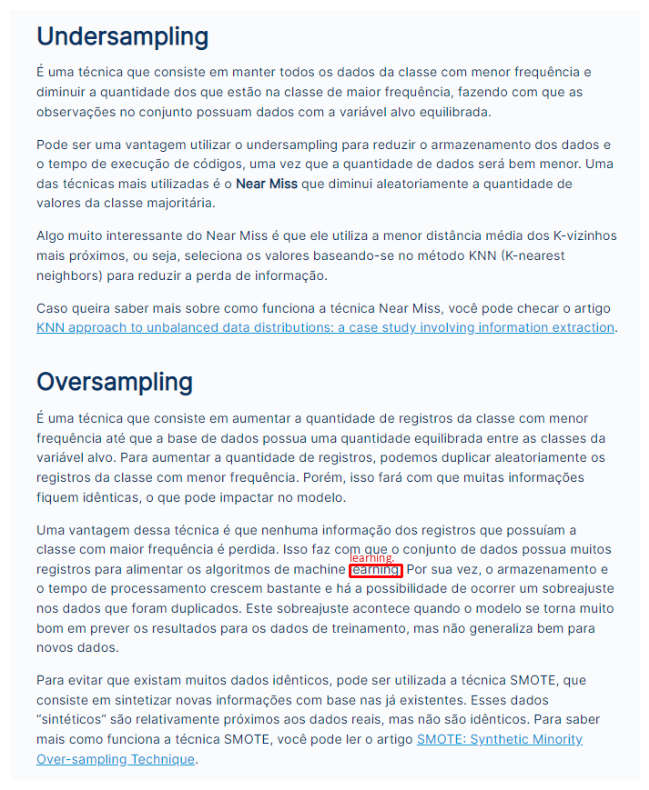

artigo-spark.png
Número de ocorrências para learning em artigo-spark.png: 1




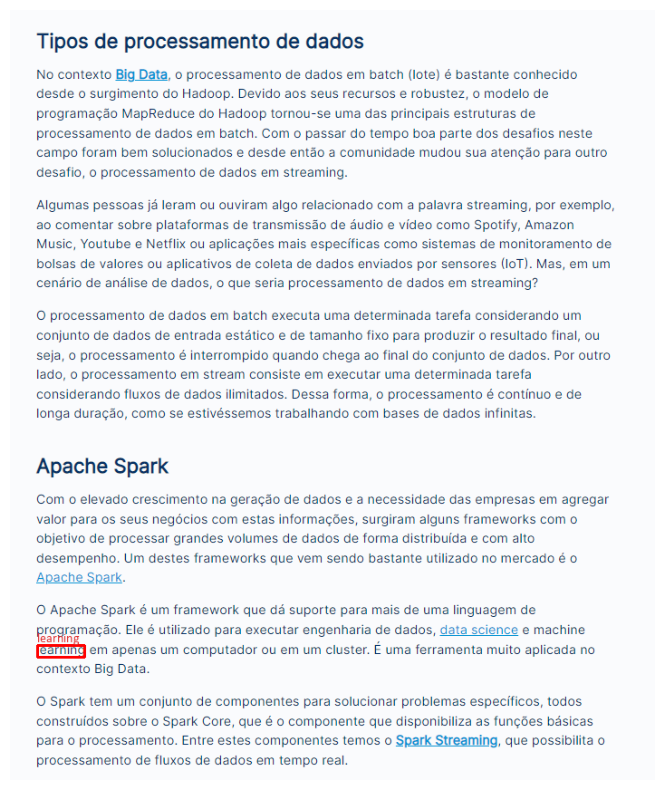

artigo-termos-ML.png
Número de ocorrências para learning em artigo-termos-ML.png: 3




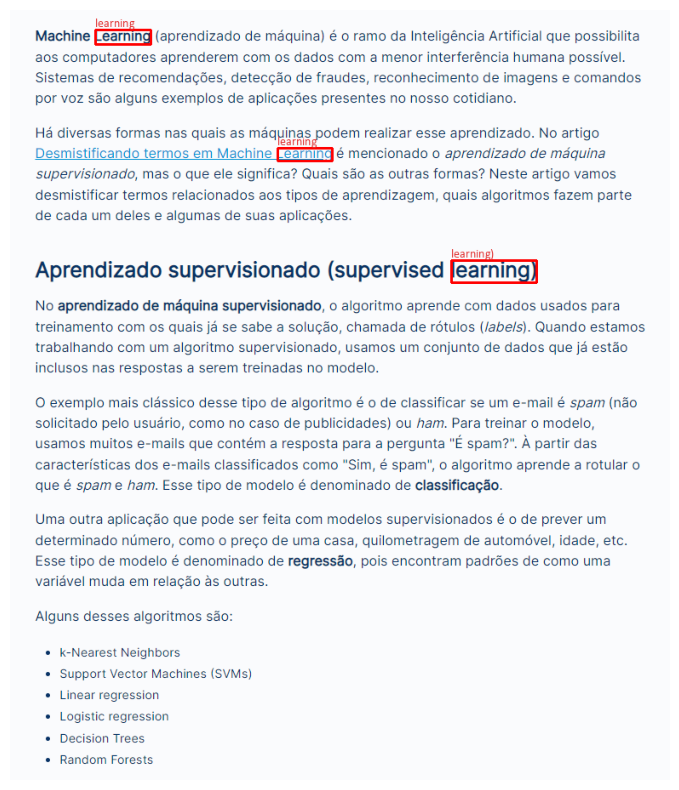

artigo-eng-dados.png
Número de ocorrências para learning em artigo-eng-dados.png: 0




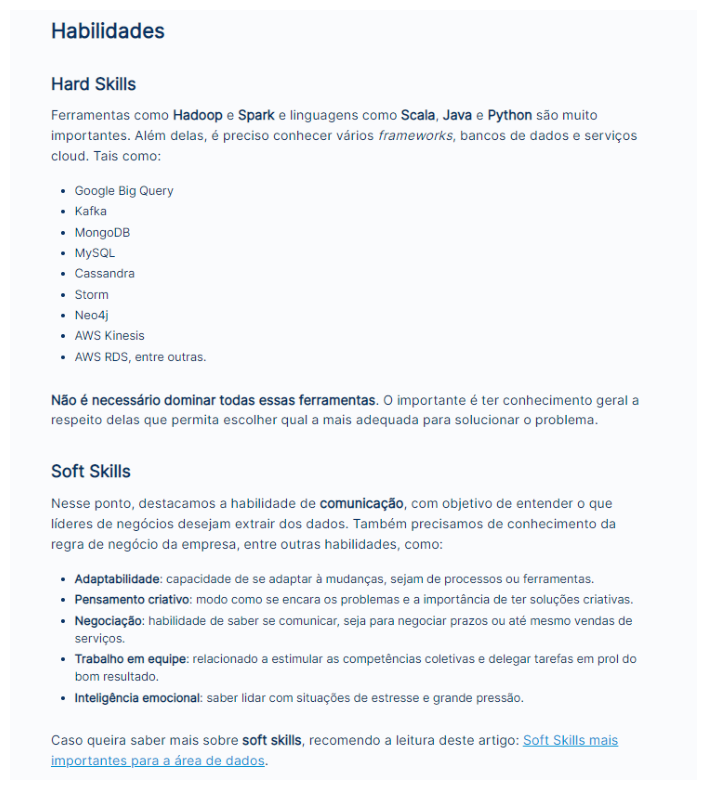

In [240]:
search_term = 'learning'

for image in project_way:
    img = cv2.imread(image)  # carrega a imagem
    img_original = img.copy()  # cria uma cópia da imagem para não escrever em cima da original

    image_name = os.path.split(image)[-1]  # pega o nome da imagem
    print('===================\n' + str(image_name))  # separação + nome da imagem

    # Chama a função OCR_image_process para processar a imagem e encontrar as ocorrências do termo
    img, occurrences_nmb = OCR_image_process(img, search_term, config_tesseract, min_conf)

    print('Número de ocorrências para {} em {}: {}'.format(search_term, image_name, occurrences_nmb))  # exibe o número de ocorrências
    print('\n') # Exibe a imagem processada (se necessário)
    
    showImages(img)  # esta função irá exibir a imagem com as caixas e o texto


# TOPICS

-   Criar um leitor para todas as imagens em uma pasta;
-   Buscar por termos específicos dentro do texto;
-   Retirar todo o texto da imagem e salvar em um arquivo de texto .txt;
-   Buscar termos específicos dentro de cada imagem e fazer o bouding box;
-   Salvar todas as imagens com termos específicos destacados.